# ISCTE-IUL - 23/24 - Licenciatura em Engenharia Informática - Desenho e Análise de Algoritmos
## Minitrabalho 2 - O Oráculo de Bacon
 Realizado por:
   - André Simões Soares nº110993
   - Carlos Eduardo Delgado Monteiro nº111284

## 1. Representação dos Dados

### 1.a. Características do Grafo

__Vértices:__ vai representar cada ator/atriz de Hollywood.
<br> __Arestas:__ vai representar a ligação entre atores/atrizes com filmes onde ambos atuaram.

__Modelo do Grafo:__ o grafo que vai ser implementado será o não-orientado , porquê a relação entre dois atores é bidirecional 
(o ator X atuou com o ator Y num filme , então o ator Y atuou com o ator X no mesmo filme) e também escolhemos este grafo devido a estes critérios:

_Vantagens:_ 
- simplifica a estrutura do grafo (facilitação das operações do jogo & conectar atores diretamente através de filmes que aturam juntos) 
- ocupa menos espaço na memória (menos informações nas arestas)
- facilidade de encontrar atores que atuaram em comum
        
_Desvantagens:_ 
- falta de eficiência de tempo para encontrar o menor caminho entre dois atores em termos de número de filmes

__Alterações na classe _Graph_ , _Vertex_ & _Edge_ :__ 
- Na classe Vertex , alteramos o nome do parâmetro no construtor vertex_id para actor_name 
- Na classe Edge alteramos o peso para o movie_name , onde será o filme onde ambos os atores atuaram
- Na classe Graph implementámos o método _Edge()_ que devolve um iterável sobre todas as arestas do Grafo.



### Implementação da classe Node , Edge & Graph

In [45]:
# Class Vertice
class Vertex:
    
    def __init__(self, actor_name):
        '''O vértice será inserido no Grafo usando o método insert_vertex(x) que cria um Vertex'''
        self._vertex_id = actor_name   # nome do ator (elemento do vértice)
        
    def __hash__(self):
        '''O valor do elemento é usado como hash para o vértice (o elemento deve ser hashable)'''
        return hash(self._vertex_id)  # devolve o hash do elemento

    def __str__(self):
        return'v{0}'.format(self._vertex_id)

    def __eq__(self, vertex):
        return self._vertex_id == vertex._vertex_id # Deve-se garantir que: se hash(vertex)==hash(self), entao vertex==self

    def __lt__(self, vertex):
        return self._vertex_id < vertex._vertex_id
    
    def __le__(self, vertex):
        return self._vertex_id <= vertex._vertex_id
    
    def __gt__(self, vertex):
        return self._vertex_id > vertex._vertex_id
    
    def __ge__(self, vertex):
        return self._vertex_id >= vertex._vertex_id
    
    def vertex_id(self):
        ''' Devolve o elemento guardado neste vértice.'''
        return self._vertex_id


# Class Edge
class Edge:
    ''' Estrutura de Aresta para um Grafo: (origem, destino) e peso '''

    def __init__(self, vertex_1, vertex_2, movie_name):
        self._vertex_1 = vertex_1
        self._vertex_2 = vertex_2
        self._movie_name = movie_name

    def __hash__(self):
        # Função que mapeia a aresta a uma posição no dicionário (hash map)
        return hash( (self._vertex_1, self._vertex_2) )

    def __str__(self):
        ''' Devolve a representação do objeto aresta em string: (origem, destino)m=filme '''
        return'E({0}|{1})m={2}'.format(self._vertex_1, self._vertex_2, self._movie_name)

    def __eq__(self, other):
        # define igualdade de duas arestas (deve ser consistente com a função hash)
        return self._vertex_1 == other._vertex_1 and self._vertex_2 == other._vertex_2

    def endpoints(self):
        ''' Devolve a tupla (vertex_1, vertex_2) os vértices adjacentes vertex_1 e vertex_2.'''
        return (self._vertex_1, self._vertex_2)
    
    def cost(self):
        ''' Devolve o peso da aresta.'''
        return self._movie_name
    
    def opposite(self, vertex):
        ''' Indica o vértice oposto ao vertex nesta aresta 
            (apenas se vertex fizer parte da aresta).'''
        if vertex == self._vertex_1:
            return self._vertex_2
        elif vertex == self._vertex_2:
            return self._vertex_1
        else:
            return None

In [46]:
class Graph:
    def __init__(self):
        '''Construtor: Cria um grafo vazio (dicionário de _adjancencies).'''
        self._adjancencies = {}  # dicionário que associa o par chave-valor: <Vertex v, Mapa de adjacências de v> 
        self._vertices = {}      # dicionário que associa o par: <id do vértice, objeto Vertex correspondente> 
        self._n = 0              # número de vértices do grafo
        self._m = 0              # número de arestas do grafo
        
    def __str__(self):
        '''Devolve a representação do grafo em string (toString)'''
        if self._n == 0:
            ret = "DAA-Graph: <empty>\n"
        else:
            ret = "DAA-Graph:\n"
            for vertex in self._adjancencies.keys():
                #ret += "vertex-"
                ret += str(vertex) + ": "
                for edge in self.incident_edges(vertex.vertex_id()):
                    ret += str(edge) + "; "
                ret += "\n"
        return ret
    
    def order(self):
        '''Ordem de um grafo: a quantidade de vértices no Grafo.'''
        return self._n
    
    def size(self):
        '''Dimensão de um grafo: a quantidade total de arestas do Grafo.'''
        return self._m 
    
    def has_vertex(self, vertex_id):
        '''Verifica se o vértice de id vertex_id está no grafo.'''
        return vertex_id in self._vertices
    
    def has_edge(self, u_id, v_id):
        '''Verifica se a aresta (u_id, v_id) existe no grafo.'''
        if not self.has_vertex(u_id) or not self.has_vertex(v_id):
            return False
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return vertex_v in self._adjancencies[vertex_u]
        
    def insert_vertex(self, vertex_id):
        '''Insere um novo vértice com o id vertex_id.'''
        if not self.has_vertex(vertex_id):
            vertex = Vertex(vertex_id)
            self._vertices[vertex_id] = vertex  # insere o novo vértice no dicionario de vertices
            self._adjancencies[vertex] = {}     # inicializa o mapa de adjacências deste vértice a vazio
            self._n +=1                         # mais um vértice no grafo

    def insert_edge(self, u_id, v_id, movie_name):
        ''' Cria e insere uma nova aresta entre u_id e v_id com peso weight.
            Se a aresta já existe no grafo, atualiza-se o seu peso.
            Também insere os vértices u_id e v_id, caso não existam.'''
        if not self.has_vertex(u_id):
            self.insert_vertex(u_id) # insere novo vertex e atualiza n
        if not self.has_vertex(v_id):
            self.insert_vertex(v_id) # insere novo vertex e atualiza n      
        if not self.has_edge(u_id, v_id):
            self._m +=1           # atualiza m apenas se a aresta ainda não existir no grafo

        vertex_u = self._vertices[u_id]
        vertex_v = self._vertices[v_id]
        e = Edge(vertex_u, vertex_v, movie_name)    
        self._adjancencies[vertex_u][vertex_v] = e  # coloca v nas adjacências de u
        self._adjancencies[vertex_v][vertex_u] = e  # e u nas adjacências de v (para facilitar a procura de todas as arestas incidentes num vértice)
    
    def incident_edges(self, vertex_id):
        '''Devolve um iterável (gerador) com todas as arestas de um vértice com id vertex_id.'''
        vertex = self._vertices[vertex_id]
        for edge in self._adjancencies[vertex].values(): # para todas as arestas incidentes em v:
            yield edge
    
    
    def get_vertex(self, vertex_id):
        ''' Devolve o objeto Vertex associado ao elemento vertex_id no grafo
        '''
        return None if not self.has_vertex(vertex_id) else self._vertices[vertex_id] 
    
    def get_edge(self, u_id, v_id):
        ''' Devolve o objeto aresta (Edge) que liga u_id a v_id. 
            Devolve None se não forem adjacentes ou se (um d)os vértices não existirem.'''  
        if not self.has_edge(u_id, v_id):
            return None
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return self._adjancencies[vertex_u][vertex_v]
    
    def vertices(self):
        return self._vertices.keys()
    
    def edges(self):
        '''Devolve um iterável sobre todas as arestas do Grafo'''
        result = set()  # usado o set para evitar arestas duplicadas
        for vertex in self._adjancencies:
            for edge in self._adjancencies[vertex].values():
                result.add(edge)
        return result
    
    # Funcao que devolve os vertice & arestas de um grafo em string (para se puder visualizar mais facilmente)
    '''  
    def vertices(self):

        return ', '.join(str(vertex) for vertex in self._vertices.values())

    def edges(self):
        result = set()  # Use a set to avoid duplicate edges
        for vertex in self._adjancencies:
            for edge in self._adjancencies[vertex].values():
                result.add(str(edge))
        return ', '.join(result)
    '''

### 1.b. Implementação da função para construir um Graph a partir dos dados de um ficheiro .txt

In [47]:
def build_graph_from_file(file_name):
    graph = Graph()
    with open(file_name, 'r' , encoding='utf-8') as file:
        for line in file:
            info = line.strip().split('/')
            movie = info[0]
            actors = info[1:]
            for i in range(len(actors)):
                for j in range(i + 1, len(actors)):
                    graph.insert_edge(actors[i], actors[j], movie)

    return graph

#Test
#graph = build_graph_from_file("test_dataset.txt")
#print(graph)
#print("Graph vertices:", graph.vertices())
#print("Graph edges:", graph.edges())

## 2. API HollywoodOracle

### 2.b. Implementação da API HollywoodOracle

In [48]:
class HollywoodOracle:
    def __init__(self, filename):
        self.graph = build_graph_from_file(filename)
        self.center = "Bacon, Kevin"
        self.distances = {}
        self.calculate_distances(self.center)
    
    def calculate_distances(self, center):
        from collections import deque
        queue = deque([center])
        visited = set([center])
        self.distances = {center: 0}
        
        while queue:
            current = queue.popleft()
            current_vertex = self.graph.get_vertex(current)
            for edge in self.graph.incident_edges(current):
                opposite_vertex = edge.opposite(current_vertex)
                if opposite_vertex.vertex_id() not in visited:
                    visited.add(opposite_vertex.vertex_id())
                    queue.append(opposite_vertex.vertex_id())
                    self.distances[opposite_vertex.vertex_id()] = self.distances[current] + 1
    
    def all_movies(self):
        # retorna todos os nomes dos filmes
        return set(edge.cost() for edge in self.graph.edges())

    def all_actors(self):
        # retorna todos os atores
        return self.graph.vertices()

    def movies_from(self, actor):
        # retorna todos os filmes em que o ator participou
        return set(edge.cost() for edge in self.graph.incident_edges(actor))

    def cast_of(self, movie):
        # retorna todos os atores que participaram no filme
        return set(vertex for edge in self.graph.edges() if edge.cost() == movie for vertex in edge.endpoints())

    def set_center_of_universe(self, actor):
        # Define um novo centro do universo
        self.center = actor
        self.calculate_distances(actor)

    def number_of_X(self, actor):
        # Retorna o "number of X" do ator
        return self.distances.get(actor, float('inf'))

    def path_to_X(self, actor):
        # Retorna o caminho para o ator
        if actor not in self.distances:
            return None
        
        path = []
        current = actor
        while current != self.center:
            for edge in self.graph.incident_edges(current):
                opposite = edge.opposite(self.graph.get_vertex(current))
                if self.distances[opposite.vertex_id()] == self.distances[current] - 1:
                    path.append((current, edge.cost(), opposite.vertex_id()))
                    current = opposite.vertex_id()
                    break
        return path

    def max_number_of_X(self):
        # Retorna o "number of X" máximo e o número de atores com "number of X" infinito
        max_distance = max(self.distances.values())
        count_infinite = len(set(self.all_actors()) - set(self.distances.keys()))
        return max_distance, count_infinite

    def count_number_of_X(self, n):
        # Retorna o número de atores com "number of X" igual a n
        return sum(1 for distance in self.distances.values() if distance == n)

    def average_number_of_X(self):
        # Retorna a média do "number of X" dos atores
        finite_distances = [distance for distance in self.distances.values() if distance != float('inf')]
        return sum(finite_distances) / len(finite_distances) if finite_distances else 0

### Verificação da API Hollywood oracle

In [49]:
small_oracle = HollywoodOracle("small_dataset_utf8.txt")
def test_hollywood_oracle(graph):
    
    '''
    print("All movies:")
    print(list(graph.all_movies()))
    
    print("\nAll actors:")
    print(list(graph.all_actors()))
    '''
    
    print("\nMovies from 'Bosco, Philip':")
    print(list(graph.movies_from('Bosco, Philip'))) 
    
    #print("\nCast of '3 Men and a Baby (1987)':")
    #cast_Actors = list(graph.cast_of('3 Men and a Baby (1987)'))
    #print(cast_Actors)
    
    print("\nPath from 'Bosco, Philip' to new center 'Bacon, Kevin':")
    print(graph.path_to_X('Bosco, Philip'))
    
    print("\nMax number of X:")
    print(graph.max_number_of_X())
    
    print("\nCount number of X = 2:")
    print(graph.count_number_of_X(2))
    
    print("\nAverage number of X:")
    print(graph.average_number_of_X())

test_hollywood_oracle(small_oracle)


Movies from 'Bosco, Philip':
['Hitch (2005 I)', 'Trading Places (1983)', 'Dream Team, The (1989)', 'Money Pit, The (1986)', 'Abandon (2002)', 'Quick Change (1990)', 'First Wives Club, The (1996)', 'Deconstructing Harry (1997)', 'Blue Steel (1990)', 'Freedomland (2006)', 'F X2 (1991)', 'Children of a Lesser God (1986)', 'It Takes Two (1995)', 'Kate & Leopold (2001)', 'Wonder Boys (2000)', 'Working Girl (1988)', 'Another Woman (1988)', "My Best Friend's Wedding (1997)", 'Suspect (1987)', 'Shadows and Fog (1992)', "Nobody's Fool (1994)", '3 Men and a Baby (1987)', 'Shaft (2000)', 'Milk Money (1994)']

Path from 'Bosco, Philip' to new center 'Bacon, Kevin':
[('Bosco, Philip', 'Abandon (2002)', 'Ward, Fred (I)'), ('Ward, Fred (I)', 'Tremors (1990)', 'Bacon, Kevin')]

Max number of X:
(6, 603)

Count number of X = 2:
74200

Average number of X:
2.388606098422029


### 2.a. Análise Informal do espaço de memória utilizado

##### Análise Teórica da Estrutura de Dados: 
__Grafo (self.graph):__ 
- _Vértices:_  Cada  vértice representa um ator, Se existirem $N$ atores a memória necessária é proporcional a $O(N)$
- _Arestas:_  Para $M$ filmes, onde cada filme tem cerca de $k$ atores teremos aproximadamente $kM$ arestas , logo a memória necessária seria $O(kM)$

__Centro (self.center):__
- o espaço de memória é constante, ou seja, $O(1)$, pois representa uma String

__Distâncias (self.distances):__
- Um dicionário que armazena a distância mínima de cada ator até o centro. Na pior hipótese, onde todos os atores estão conectados ao centro, ocupa $O(N)$ em espaço

##### Análise Prática da Estrutura de Dados e consumo de Memória: 

In [50]:
from sys import getsizeof

# Usou-se o fichiero small_dataset_utf8.txt
# Tamanho do grafo
graph_size = getsizeof(small_oracle.graph)  # Tamanho básico do objeto grafo

# Tamanho do centro do universo
center_size = getsizeof(small_oracle.center)


# Tamanhos adicionais de componentes do grafo
vertices_size = sum(getsizeof(v) for v in small_oracle.graph.vertices())
edges_size = sum(getsizeof(e) for e in small_oracle.graph.edges())

# Tamanho do dicionário de distâncias
distances_size = getsizeof(small_oracle.distances)

print("Tamanho do objeto Grafo:", graph_size,"bytes")
print("Tamanho dos vértices do Grafo:", vertices_size,"bytes")
print("Tamanho das arestas do Grafo:",edges_size,"bytes")
print("Tamanho do dicionário de distâncias:", distances_size,"bytes")
print("Tamanho do centro do universo:", center_size,"bytes")

Tamanho do objeto Grafo: 56 bytes
Tamanho dos vértices do Grafo: 7931095 bytes
Tamanho das arestas do Grafo: 429932664 bytes
Tamanho do dicionário de distâncias: 3844864 bytes
Tamanho do centro do universo: 61 bytes


## 3. Testes

#### Criação do grafo com cada um dos ficheiros

In [51]:
#small_oracle = HollywoodOracle("small_dataset_utf8.txt") -> ja foi criado mais acima
large_oracle = HollywoodOracle("large_dataset_utf8.txt")

### 3.1. Histograma do número de atores com o mesmo “número de Bacon”

Bacon Number 0: 1 actors
Bacon Number 1: 2532 actors
Bacon Number 2: 232975 actors
Bacon Number 3: 560212 actors
Bacon Number 4: 97968 actors
Bacon Number 5: 6990 actors
Bacon Number 6: 815 actors
Bacon Number 7: 63 actors
Bacon Number 8: 14 actors
Average Bacon Number: 2.8632086249542463


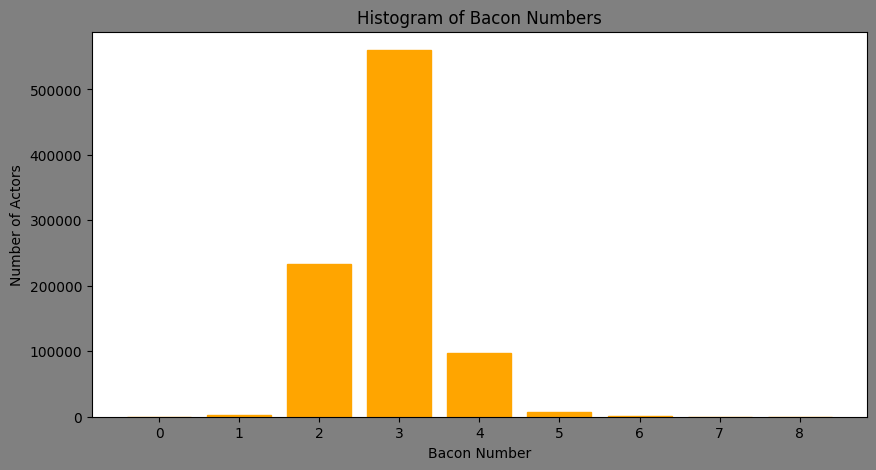

In [55]:
import matplotlib.pyplot as plt

# Cria um histograma e estatísticas sobre o número de atores com Bacon Number 0, 1, 2, etc.
def create_histogram_and_stats(oracle):

    max_bacon_number, _ = oracle.max_number_of_X()
    bacon_counts = {}
    for i in range(max_bacon_number + 1):
        bacon_counts[i] = oracle.count_number_of_X(i)
    

    for bacon_number, count in bacon_counts.items():
        print(f'Bacon Number {bacon_number}: {count} actors')

    average_bacon = oracle.average_number_of_X()
    print(f'Average Bacon Number: {average_bacon}')

    plt.figure(figsize=(10, 5) , facecolor='grey' )
    plt.bar(bacon_counts.keys(), bacon_counts.values(), color='orange', edgecolor='orange')
    plt.xlabel('Bacon Number')
    plt.ylabel('Number of Actors')
    plt.title('Histogram of Bacon Numbers')
    plt.xticks(list(bacon_counts.keys()))
    plt.show()

create_histogram_and_stats(large_oracle)

### 3.2. Gráfico do “número de X” médio considerando como o “centro do universo” cada um dos 20 atores mais populares de Hollywood nos anos 2000, segundo o IMBD

Depp, Johnny: 2.871358851780782
Damon, Matt: 2.907931719112215
Clooney, George: 2.877270761005801
Jolie, Angelina: 2.962805993988265
Blanchett, Cate: 2.9758166309881653
Bale, Christian: 2.9393857382122297
Pitt, Brad: 2.869159355346784
DiCaprio, Leonardo: 2.8920117129008287
Ledger, Heath: 3.1100114245150126
Portman, Natalie: 2.949464822476347
Diaz, Cameron: 2.9592200272857347
Aniston, Jennifer: 3.0929656044455784
Neeson, Liam: 2.8505739986911722
Crowe, Russell: 2.9393180784631254
Banderas, Antonio (I): 2.8517386337167387
Bullock, Sandra: 2.9773051454684607
Roberts, Julia (I): 2.8515234535310623
Thurman, Uma: 2.8781115165766384
Smith, Will (I): 2.99873110241024
Hanks, Tom: 2.8632086249542463


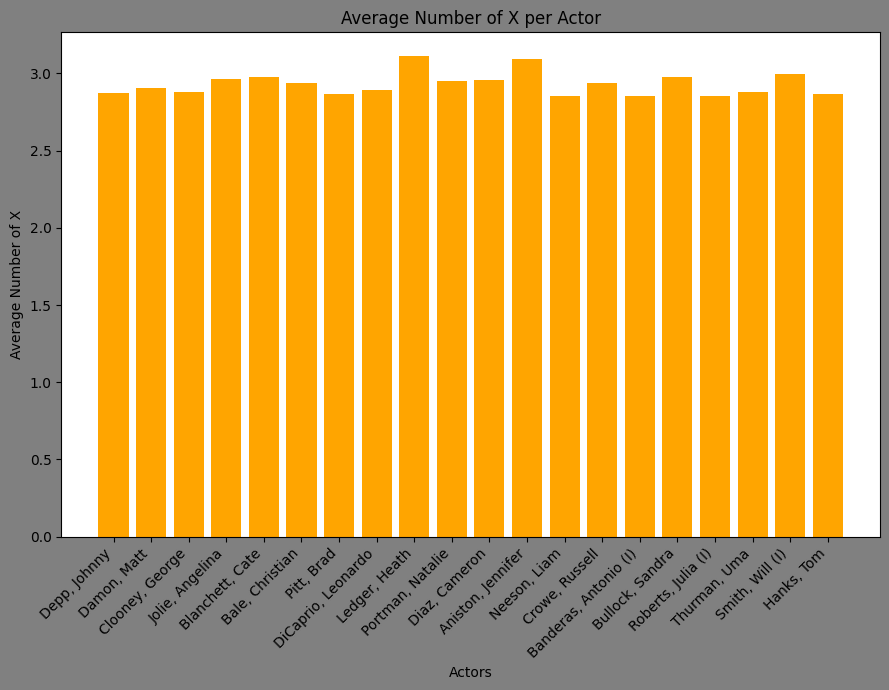

In [56]:
def load_actors(filename):
    """Load the list of actors from a CSV file."""
    actors = []
    with open(filename , 'r') as csvfile:
        for line in csvfile:
            actor = line.strip().split(';')
            actors.append(actor[1])
    return actors

#print(load_actors("top20imbd.csv"))

# Função que desenha o histograma e calcula as estatísticas para os 20 atores do ficheiro top20imbd.csv
def draw_stats(actors, oracle):
    actors = load_actors("top20imbd.csv")
    results = {}
    for actor in actors:
        oracle.set_center_of_universe(actor)
        average_number_of_x = oracle.average_number_of_X()
        results[actor] = average_number_of_x
    
    for actor, average in results.items():
        print(f'{actor}: {average}')
    
    # Plotting
    actors, averages = zip(*results.items())
    plt.figure(figsize=(9, 7), facecolor='grey')
    plt.bar(actors, averages, color='orange')
    plt.xlabel('Actors')
    plt.ylabel('Average Number of X')
    plt.title('Average Number of X per Actor')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

draw_stats("top20imbd.csv", large_oracle)

### 3.3. Gráfico do “número de X” médio considerando como o “centro do universo” 1000 atores selecionados de forma aleatória da base de dados

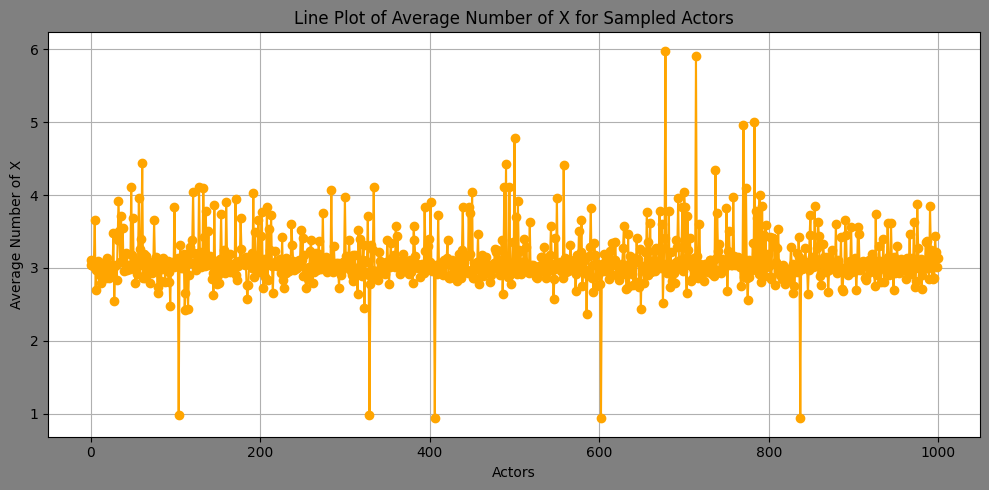

In [54]:
import random

def random_sample_actors(actors, num_samples=1000):
    """ Randomly sample a number of actors from the list """
    return random.sample(actors, min(num_samples, len(actors)))

def calculate_and_plot_line(oracle):
    all_actors = list(oracle.all_actors())
    sampled_actors = random_sample_actors(all_actors)
    results = {}

    # calcula o número médio de X para cada ator amostrado
    for actor in sampled_actors:
        oracle.set_center_of_universe(actor)
        average_number_of_x = oracle.average_number_of_X()
        results[actor] = average_number_of_x

    # Plotting
    plt.figure(figsize=(10, 5) , facecolor='grey')
    plt.plot(   list(results.values()) , marker='o', linestyle='-', color='orange')
    plt.xlabel('Actors')
    plt.ylabel('Average Number of X')
    plt.title('Line Plot of Average Number of X for Sampled Actors')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

calculate_and_plot_line(small_oracle)